In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [15]:
od.download('https://www.kaggle.com/datasets/tongpython/cat-and-dog')

Skipping, found downloaded files in "./cat-and-dog" (use force=True to force download)


#import libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_dir = "/content/cat-and-dog/training_set/training_set"
test_dir  = "/content/cat-and-dog/test_set/test_set"


print("Train directory:", train_dir)
print("Test directory:", test_dir)

Train directory: /content/cat-and-dog/training_set/training_set
Test directory: /content/cat-and-dog/test_set/test_set


In [18]:
!ls -R /content/cat-and-dog


/content/cat-and-dog:
test_set  training_set

/content/cat-and-dog/test_set:
test_set

/content/cat-and-dog/test_set/test_set:
cats  dogs

/content/cat-and-dog/test_set/test_set/cats:
 cat.4001.jpg	    cat.4249.jpg       cat.4501.jpg	  cat.4751.jpg
 cat.4002.jpg	    cat.4250.jpg       cat.4502.jpg	  cat.4752.jpg
 cat.4003.jpg	    cat.4251.jpg       cat.4503.jpg	  cat.4753.jpg
 cat.4004.jpg	    cat.4252.jpg       cat.4504.jpg	  cat.4754.jpg
 cat.4005.jpg	    cat.4253.jpg       cat.4505.jpg	  cat.4755.jpg
 cat.4006.jpg	    cat.4254.jpg       cat.4506.jpg	  cat.4756.jpg
 cat.4007.jpg	    cat.4255.jpg       cat.4507.jpg	  cat.4757.jpg
 cat.4008.jpg	    cat.4256.jpg       cat.4508.jpg	  cat.4758.jpg
 cat.4009.jpg	    cat.4257.jpg       cat.4509.jpg	  cat.4759.jpg
 cat.4010.jpg	    cat.4258.jpg       cat.4510.jpg	  cat.4760.jpg
 cat.4011.jpg	    cat.4259.jpg       cat.4511.jpg	  cat.4761.jpg
 cat.4012.jpg	    cat.4260.jpg       cat.4512.jpg	  cat.4762.jpg
 cat.4013.jpg	    cat.4261.jpg      

In [19]:
print('Train cats :',len(os.listdir(train_dir +'/cats')))
print('Train dogs :',len(os.listdir(train_dir +'/dogs')))
print('Train cats :',len(os.listdir(test_dir +'/cats')))
print('Train dogs :',len(os.listdir(test_dir +'/dogs')))

Train cats : 4001
Train dogs : 4006
Train cats : 1012
Train dogs : 1013


In [20]:
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen=ImageDataGenerator(
    rescale=1/255,
    horizontal_flip=True,
    zoom_range=0.2
)

test_gen=ImageDataGenerator(rescale=1/255)

train_loader=train_gen.flow_from_directory(
    train_dir,target_size=(224,224),batch_size=32,class_mode='binary'
)

test_loader=test_gen.flow_from_directory(
    test_dir,target_size=(224,224),batch_size=32,class_mode='binary'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# build cnn model

In [21]:
def build_cnn():
  model=keras.Sequential([
      layers.Input(shape=(224,224,3)),
      layers.Conv2D(32,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(64,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(128,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D(2,2),
      layers.Conv2D(256,(3,3),activation='relu',padding='same'),
      layers.MaxPooling2D(2,2),

      layers.Flatten(),
      layers.Dense(256,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(64,activation='relu'),
      layers.Dense(1,activation='sigmoid')
  ])
  return model


In [22]:
model=build_cnn()

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,250,241 (50.55 MB)

 Trainable params: 13,250,241 (50.55 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

callbacks=[
    EarlyStopping(patience=5,verbose=1,monitor='val_loss'),
    ReduceLROnPlateau(factor=0.5,patience=3,verbose=1,min_lr=1e-6,monitor='val_loss')
]


#Train the model

In [26]:
history=model.fit(train_loader,epochs=30,validation_data=test_loader,callbacks=callbacks)

Epoch 1/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 125s 462ms/step - accuracy: 0.5412 - loss: 0.6892 - val_accuracy: 0.6307 - val_loss: 0.6307 - learning_rate: 0.0010
Epoch 2/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 110s 438ms/step - accuracy: 0.6293 - loss: 0.6424 - val_accuracy: 0.7034 - val_loss: 0.5647 - learning_rate: 0.0010
Epoch 3/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 109s 435ms/step - accuracy: 0.6859 - loss: 0.5894 - val_accuracy: 0.6831 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 4/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 111s 440ms/step - accuracy: 0.7186 - loss: 0.5536 - val_accuracy: 0.7484 - val_loss: 0.5142 - learning_rate: 0.0010
Epoch 5/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 109s 434ms/step - accuracy: 0.7464 - loss: 0.5163 - val_accuracy: 0.7677 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 6/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 110s 440ms/step - accuracy: 0.7739 - loss: 0.4703 - val_accuracy: 0.8181 - val_loss: 0.4228 - learning_rate: 0.0010
Epoch 7/30
251/251 ━━━━━━━━━━━━━━━━━━━━ 111s 443ms/step - accura

#Plot accuracy and loss curves

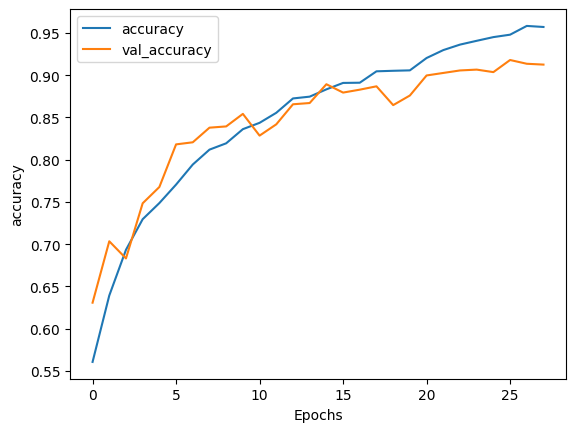

In [27]:
#accuracy
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

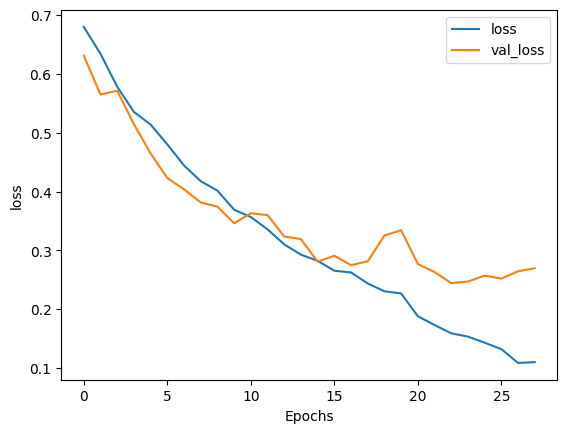

In [28]:
#loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#evaluation on test set

In [29]:
test_loss,test_acc=model.evaluate(test_loader)
print('Test loss:',test_loss)
print('Test accuracy:',test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9107 - loss: 0.2757
Test loss: 0.2696634531021118
Test accuracy: 0.9125061631202698


#image predict

In [42]:
from tensorflow.keras.preprocessing import image

def predict_img(img_path):
  img=image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img)/255
  x=np.expand_dims(x,axis=0)
  prob = model.predict(x)[0][0]

  if prob > 0.5:
        return f"DOG | Confidence: {prob:.2f}"
  else:
        return f"CAT| Confidence: {(1 - prob):.2f}"

In [48]:
predict_img('/content/puppy-1047521_1280.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


'DOG | Confidence: 0.97'

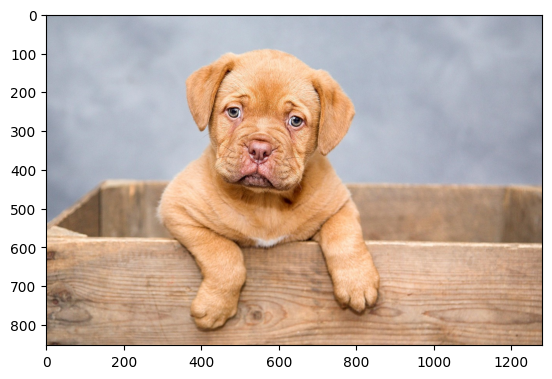

In [51]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/puppy-1047521_1280.jpg')
plt.imshow(img)

In [52]:
predict_img('/content/cute-cat.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


'CAT| Confidence: 1.00'

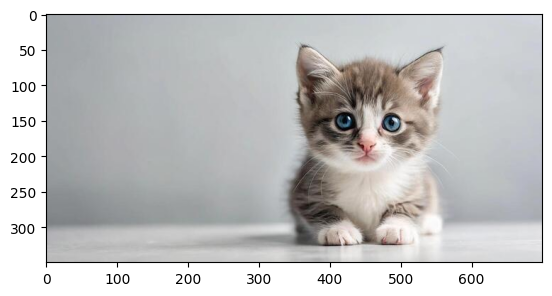

In [53]:
img=image.load_img('/content/cute-cat.jpg')
plt.imshow(img)